IMPORTACION DE MODULOS Y SETEO DE PATH DE DATOS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


path_dataset:str = "dataset/movies_dataset.csv"

In [2]:
movie_set = pd.read_csv(path_dataset)

In [3]:
movie_set.tail(10)

,id,title,genre,original_language,overview,popularity,release_date,vote_average,vote_count
9990,146203,The Last Exorcism Part II,"Horror,Thriller",en,As Nell Sweetzer tries to build a new life aft...,15.757,2013-02-28,4.7,444
9991,551808,Black Christmas,"Horror,Mystery,Thriller",en,"During Christmas break, the women at Hawthorne...",9.811,2019-12-11,4.7,412
9992,853588,Prey,Thriller,de,A hiking trip into the wild turns into a despe...,64.052,2021-09-10,4.7,254
9993,17455,Hellraiser: Deader,"Horror,Mystery,Thriller",en,"In London, after investigating crack addicted ...",15.512,2005-06-07,4.7,227
9994,168098,Cell,"Horror,Science Fiction,Thriller",en,When a strange signal pulsates through all cel...,19.521,2016-07-06,4.7,910
9995,10196,The Last Airbender,"Action,Adventure,Fantasy",en,"The story follows the adventures of Aang, a yo...",98.322,2010-06-30,4.7,3347
9996,331446,Sharknado 3: Oh Hell No!,"Action,TV Movie,Science Fiction,Comedy,Adventure",en,The sharks take bite out of the East Coast whe...,12.490,2015-07-22,4.7,417
9997,13995,Captain America,"Action,Science Fiction,War",en,"During World War II, a brave, patriotic Americ...",18.333,1990-12-14,4.6,332
9998,2312,In the Name of the King: A Dungeon Siege Tale,"Adventure,Fantasy,Action,Drama",en,A man named Farmer sets out to rescue his kidn...,15.159,2007-11-29,4.7,668
9999,455957,Domino,"Thriller,Action,Crime",en,Seeking justice for his partner’s murder by an...,16.482,2019-05-31,4.6,221


In [4]:
movie_set.columns = ['index_id','titulo','genero','idioma_original','review','popularidad','fecha_salida','voto_promedio','votos']

In [5]:
movie_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index_id         10000 non-null  int64  
 1   titulo           10000 non-null  object 
 2   genero           9997 non-null   object 
 3   idioma_original  10000 non-null  object 
 4   review           9987 non-null   object 
 5   popularidad      10000 non-null  float64
 6   fecha_salida     10000 non-null  object 
 7   voto_promedio    10000 non-null  float64
 8   votos            10000 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 703.2+ KB


In [6]:
movie_set.describe()

,index_id,popularidad,voto_promedio,votos
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,161243.505000,34.697267,6.621150,1547.309400
std,211422.046043,211.684175,0.766231,2648.295789
min,5.000000,0.600000,4.600000,200.000000
25%,10127.750000,9.154750,6.100000,315.000000
50%,30002.500000,13.637500,6.600000,583.500000
75%,310133.500000,25.651250,7.200000,1460.000000
max,934761.000000,10436.917000,8.700000,31917.000000


In [7]:
movie_set.genero = movie_set.genero.astype('category')
movie_set.genero.cat.categories

Index(['Action', 'Action,Adventure', 'Action,Adventure,Animation',
       'Action,Adventure,Animation,Comedy',
       'Action,Adventure,Animation,Comedy,Family',
       'Action,Adventure,Animation,Drama', 'Action,Adventure,Animation,Family',
       'Action,Adventure,Animation,Family,Comedy',
       'Action,Adventure,Animation,Fantasy,Science Fiction',
       'Action,Adventure,Animation,Horror',
       ...
       'Western,Drama,Adventure', 'Western,Drama,Crime',
       'Western,Drama,History', 'Western,Drama,Mystery',
       'Western,Drama,Thriller', 'Western,History,War,Drama', 'Western,Horror',
       'Western,Horror,Thriller', 'Western,Mystery,Thriller,Drama',
       'Western,Thriller'],
      dtype='object', length=2123)

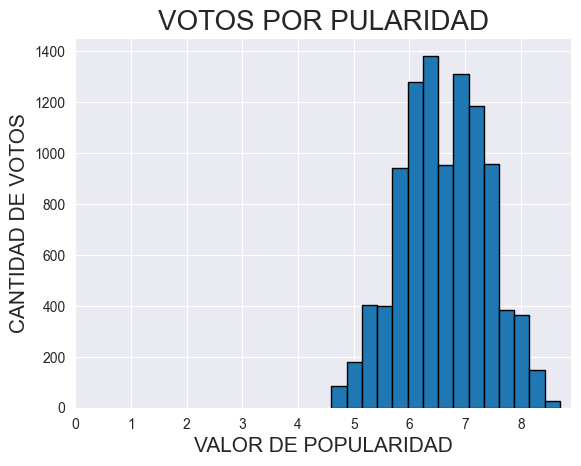

In [8]:
sns.set_style('darkgrid')

m = plt.hist(movie_set.voto_promedio, bins =15,ec='Black')
plt.xlim(xmin=0.0)
plt.title("VOTOS POR PULARIDAD", fontsize=20)
plt.ylabel("CANTIDAD DE VOTOS", fontsize=15)
plt.xlabel("VALOR DE POPULARIDAD", fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

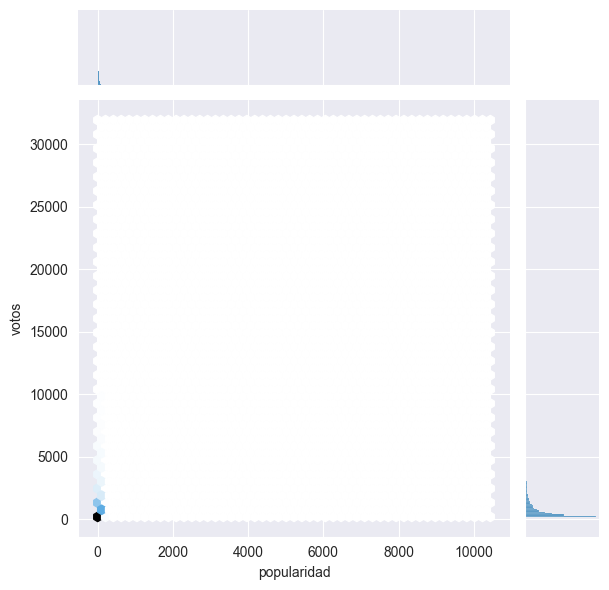

In [9]:
sns.set_style('darkgrid')
sns.jointplot(data = movie_set, x='popularidad' ,y='votos', kind='hex')

LIMPIEZA DE DATOS

In [10]:
movie_set.genero = movie_set.genero.astype('str')

In [11]:
movies = movie_set[['index_id', 'titulo', 'review', 'genero']]

In [12]:
movies.isnull().sum()


index_id     0
titulo       0
review      13
genero       0
dtype: int64

In [13]:
movies['tags'] = movies['review'] + movies['genero']

/tmp/ipykernel_81359/1482151588.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['review'] + movies['genero']


In [14]:
movie_df = movies.drop(columns=['review','genero'])

VECTORIZACION
---

- Se piensa con el conceptio de bag of words


In [15]:
from sklearn.feature_extraction.text import CountVectorizer


In [16]:

cv = CountVectorizer(max_features=10000, stop_words='english')


In [17]:
vector = cv.fit_transform(movie_df['tags'].values.astype('U')).toarray()

In [18]:
vector

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [19]:
from sklearn.metrics.pairwise import cosine_similarity

In [20]:
similarity = cosine_similarity(vector)

In [21]:
similarity[9923]

array([0.        , 0.02946278, 0.        , ..., 0.        , 0.07715167,
       0.03608439])

    CORE UTILIZANDO SIMILARIDAD DE COSENO

---

In [22]:


def recomendador(input:str,amount:int = 3):
    i = movie_df[movie_df['titulo'] == input].index[0]
    l = sorted(
        list(
            enumerate(similarity[i])
        ),
        reverse=True,
        key=lambda x:x[1]
    )
    for _ in l[:amount]:
        print( movie_df.iloc[_[0]].titulo )


In [23]:
import pickle


In [24]:

pickle.dump(movie_df,open('./pickle_files/lista_peliculas.pkl','wb'))
pickle.dump(similarity,open('./pickle_files/similarity.pkl','wb'))


In [25]:
pickle.load(open('./pickle_files/lista_peliculas.pkl','rb'))

,index_id,titulo,tags
0,278,The Shawshank Redemption,Framed in the 1940s for the double murder of h...
1,19404,Dilwale Dulhania Le Jayenge,"Raj is a rich, carefree, happy-go-lucky second..."
2,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o..."
3,424,Schindler's List,The true story of how businessman Oskar Schind...
4,240,The Godfather: Part II,In the continuing saga of the Corleone crime f...
...,...,...,...
9995,10196,The Last Airbender,"The story follows the adventures of Aang, a yo..."
9996,331446,Sharknado 3: Oh Hell No!,The sharks take bite out of the East Coast whe...
9997,13995,Captain America,"During World War II, a brave, patriotic Americ..."
9998,2312,In the Name of the King: A Dungeon Siege Tale,A man named Farmer sets out to rescue his kidn...
